# Milestone 1 Project

## 1.0 Project Dependencies

### 1.1 Pip Installs

requirements.txt
deepnote format with ruff (ruf styling guide)
Google: 

In [1]:
!pip install plotly
!pip install altair
!pip install openpyxl



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 42.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


### 1.2 Import Libraries

In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import altair as alt

### 1.3 Import Datasets

### Importing: Expense Data

In [3]:
# Read in the expense data
expense_df = pd.read_excel('current_expense.xlsx', skiprows=10)

# Cleaning the expense data
expense_df = expense_df.rename(columns={'CDS':'District Code',
                                        'District': 'District Name',
                                        'Current\nExpense ADA': 'Expense ADA',
                                        'Current\nExpense per ADA': 'Expense per ADA'})
expense_df = expense_df.drop(['CO'], axis=1)

# Display the cleaned expense data
display(expense_df.shape)
display(expense_df.head())
# display(expense_df)

(933, 6)

,District Code,District Name,EDP 365,Expense ADA,Expense per ADA,LEA Type
0,61119,Alameda Unified,1.550948e+08,8567.86,18101.93,Unified
1,61127,Albany City Unified,6.149090e+07,3435.41,17899.14,Unified
2,61143,Berkeley Unified,2.205508e+08,8572.17,25728.70,Unified
3,61150,Castro Valley Unified,1.424913e+08,8991.52,15847.30,Unified
4,61168,Emery Unified,1.586300e+07,554.70,28597.44,Unified


### Importing: Districts Data

In [4]:
# Read in the district data
district_df = pd.read_excel('district_areas.xlsx')

# Cleaning the district data
district_df['District Code'] = district_df['District Code'].astype(str).str[-5:].astype('int64')
district_df_new = district_df.drop(['Year',
                                    'DistrctAreaSqMi',
                                    'Shape__Area',
                                    'Shape__Length',
                                    'OBJECTID', 
                                    'US Congress District', 
                                    'CA Senate District', 
                                    'CA Assembly District', 
                                    'Locale', 
                                    'Update Notes'], axis=1)

# Display the cleaned district data
display(district_df_new.shape)
display(district_df_new.head())
# display(district_df_new)

(938, 44)

,Fed ID,District Code,CDS Code,County Name,District Name,District Type,Grade Low,Grade High,Grade Low Census,Grade High Census,...,Foster,Foster (%),Homeless,Homeless (%),Migrant,Migrant (%),Students with Disabilities,Students with Disabilities (%),Socioeconomically Disadvantaged,Socioeconomically Disadvantaged (%)
0,601770,61119,1611190000000,Alameda,Alameda Unified,Unified,KG,12,KG,12,...,27,0.3,91,0.9,0,0.0,1286,12.2,4035,38.2
1,601860,61127,1611270000000,Alameda,Albany City Unified,Unified,KG,12,KG,12,...,1,0.0,24,0.7,0,0.0,320,9.0,1122,31.4
2,604740,61143,1611430000000,Alameda,Berkeley Unified,Unified,KG,12,KG,12,...,32,0.4,150,1.7,0,0.0,1092,12.0,2508,27.6
3,607800,61150,1611500000000,Alameda,Castro Valley Unified,Unified,KG,12,KG,12,...,5,0.1,135,1.4,0,0.0,1048,11.0,3686,38.8
4,612630,61168,1611680000000,Alameda,Emery Unified,Unified,KG,12,KG,12,...,1,0.2,13,2.2,0,0.0,75,12.5,327,54.5


## 2 Data Investigation

In [5]:
# Check for column types and any null/missing values
display(expense_df.info()) 
display(district_df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   District Code    933 non-null    int64  
 1   District Name    933 non-null    object 
 2   EDP 365          933 non-null    float64
 3   Expense ADA      933 non-null    float64
 4   Expense per ADA  933 non-null    float64
 5   LEA Type         933 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 43.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 44 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Fed ID                               938 non-null    int64  
 1   District Code                        938 non-null    int64  
 2   CDS Code                             938 non-null    int64  
 3   County Name                          938 non-null    object 
 4   District Name                        938 non-null    object 
 5   District Type                        938 non-null    object 
 6   Grade Low                            938 non-null    object 
 7   Grade High                           938 non-null    int64  
 8   Grade Low Census                     938 non-null    object 
 9   Grade High Census                    938 non-null    int64  
 10  Assistance Status                    930 non-null    object 
 11  Enroll Total                    

None

### Determining Differences in Length Between the Datasets

In [6]:
# Correcting the code to ensure len(codes_excluded) is 933

# Get unique district codes from both dataframes
expense_codes = expense_df['District Code'].unique()
district_codes = district_df_new['District Code'].unique()

# Find codes that are in district(938) and NOT in expense(933)
codes_excluded_from_expense = [code for code in district_codes if code not in expense_codes]

# Find codes that are in expense(933) and NOT in district(938)
codes_excluded_from_district = [code for code in expense_codes if code not in district_codes]

# Check excluded codes between two datasets
print(f'Number of Values not in Expense: {len(codes_excluded_from_expense)} \nList: {codes_excluded_from_expense}')
print(district_df_new[district_df_new['District Code'].isin(codes_excluded_from_expense)]['District Name'].tolist())
print(f'Number of Values not in District: {len(codes_excluded_from_district)} \nList: {codes_excluded_from_district}')
print(expense_df[expense_df['District Code'].isin(codes_excluded_from_district)]['District Name'].tolist())

Number of Values not in Expense: 10 
List: [65557, 65599, 69815, 69823, 70854, 70862, 70912, 70920, 71167, 71175]
['Arena Union Elementary', 'Point Arena Joint Union High', 'Santa Cruz City Elementary', 'Santa Cruz City High', 'Petaluma City Elementary', 'Petaluma Joint Union High', 'Santa Rosa Elementary', 'Santa Rosa High', 'Modesto City Elementary', 'Modesto City High']
Number of Values not in District: 5 
List: [76349, 40261, 40246, 40253, 40717]
['Arena Union Elementary/Point Arena Joint Union High ', 'Santa Cruz City Elementary/High', 'Petaluma City Elementary/Joint Union High', 'Santa Rosa City Schools', 'Modesto City Schools']


## Combining Pairs of Districts [in District df] to Correlate with Districts Expense df

During EDA, we identified 10 districts in our District DF dataset that were not included in our Expense DF dataset.

['Arena Union Elementary', 'Point Arena Joint Union High', 'Santa Cruz City Elementary', 'Santa Cruz City High', 'Petaluma City Elementary', 'Petaluma Joint Union High', 'Santa Rosa Elementary', 'Santa Rosa High', 'Modesto City Elementary', 'Modesto City High']


Likewise, 5 districts in our Expense DF dataset were not in our District DF dataset.

['Arena Union Elementary/Point Arena Joint Union High ', 'Santa Cruz City Elementary/High', 'Petaluma City Elementary/Joint Union High', 'Santa Rosa City Schools', 'Modesto City Schools']


After comparing the two lists, we found the following:

In [7]:
district_table_dict = {
    'Arena Union Elementary': 'Arena Union Elementary/Point Arena Joint Union High ',
    'Point Arena Joint Union High': 'Arena Union Elementary/Point Arena Joint Union High ',
    'Santa Cruz City Elementary': 'Santa Cruz City Elementary/High',
    'Santa Cruz City High': 'Santa Cruz City Elementary/High',
    'Petaluma City Elementary': 'Petaluma City Elementary/Joint Union High',
    'Petaluma Joint Union High': 'Petaluma City Elementary/Joint Union High',
    'Santa Rosa Elementary': 'Santa Rosa City Schools',
    'Santa Rosa High': 'Santa Rosa City Schools',
    'Modesto City Elementary': 'Modesto City Schools',
    'Modesto City High': 'Modesto City Schools'
}

dict_df = (
    pd.DataFrame(list(district_table_dict.items()), columns=['Original Districts', 'Unified District Name'])
    .groupby('Unified District Name')['Original Districts']
    .apply(lambda x: ', '.join(x))
    .reset_index()
)

display(dict_df)


,Unified District Name,Original Districts
0,Arena Union Elementary/Point Arena Joint Union...,"Arena Union Elementary, Point Arena Joint Unio..."
1,Modesto City Schools,"Modesto City Elementary, Modesto City High"
2,Petaluma City Elementary/Joint Union High,"Petaluma City Elementary, Petaluma Joint Union..."
3,Santa Cruz City Elementary/High,"Santa Cruz City Elementary, Santa Cruz City High"
4,Santa Rosa City Schools,"Santa Rosa Elementary, Santa Rosa High"


## Maintaining Fidelity with 5 Unified Districts

What to do in case of geography??? Not sure yet how to deal with unified/combined schools???

Given that the Expense data used only the Unified District Names, we decided to do the following:

1). Manually identify all 10 districts in the District DF dataframe

2). Locales were the same across unified districts, so we kept them as is. 

3). Sum the values for the following district values: ['Enroll Total',  'Enroll Charter', 'Enroll Non Charter']

4). Sum the values for all ['Race & Ethnicity', 'English Learners', 'Foster, 'Homeless', 'Migrant', 'Students with Disabilities', and 'Socioeconomically Disadvantaged'] columns for Count values only.

5). Recalculate the percentages for all values in Step 4.

Ultimately, our final merged dataset will only contain the Unified District Names for these 10 specific districts.

## Manually Merging 10 Districts into 5 Unified Districts
& Merging District Expense & District Areas Datasets

In [8]:
print('Unique District Codes in district_df_new: ', district_df_new['District Code'].nunique())
print('Unique District Codes in expense_df: ', expense_df['District Code'].nunique())
print('\n')
print('5 Codes Excluded from district_df_new: ', codes_excluded_from_district)
print('10 Codes Excluded from expense_df: ',codes_excluded_from_expense)

Unique District Codes in district_df_new:  938
Unique District Codes in expense_df:  933


5 Codes Excluded from district_df_new:  [76349, 40261, 40246, 40253, 40717]
10 Codes Excluded from expense_df:  [65557, 65599, 69815, 69823, 70854, 70862, 70912, 70920, 71167, 71175]


### Step 1: Creating a Dictionary of District Codes to be Unified

In [9]:
# Trial 2

# Dictionary of District Codes to be unified
# Key:    Un-unified District Code to be replaced
# Value:  UnifiedDistrict Code to replace with
dict_of_codes = {
    65557: 76349,
    65599: 76349,
    69815: 40261, 
    69823: 40261,
    70854: 40246,
    70862: 40246,
    70912: 40253,
    70920: 40253,
    71167: 40717,
    71175: 40717
}

district_df_new = district_df_new.copy()

# Replace 10 District Codes in `district_df_new` with 5 Unified District Codes
district_df_new['District Code'] = district_df_new['District Code'].replace(dict_of_codes)

print("Unique Codes after Code replacement:", district_df_new['District Code'].nunique())                #933
print("Unique Names in district_df before Name replace: ", district_df_new['District Name'].nunique())   #927
print("Unique Names in expense_df before Name replace: ", expense_df['District Name'].nunique())         #919


Unique Codes after Code replacement: 933
Unique Names in district_df before Name replace:  927
Unique Names in expense_df before Name replace:  919


This tells us 2 things:
         1). #Codes > #Names
         2). Why does district_df_new have 8 MORE NAMES than expense_df??? (927-919)

district_df_new:
933 – 927 = 6 “collisions” (situations where 2+ codes share the same name)

expense_df:
933 – 919 = 14 collisions

So #Codes > #Names makes sense.

### Step 2: Determine Different District Names in Expense & District DataFrames

In [10]:
names_in_district = set(district_df_new['District Name'].unique())
names_in_expense  = set(expense_df['District Name'].unique())

only_in_district = names_in_district - names_in_expense
only_in_expense  = names_in_expense - names_in_district

print("Names only in district_df_new:", len(only_in_district))
print(sorted(list(only_in_district)))
print("Names only in expense_df:", len(only_in_expense))
print(sorted(list(only_in_expense)))

# Now we know that:
# district_df_new  uses  shorter names
# expense_df       uses  longer names

Names only in district_df_new: 92
['Alisal Union', 'Arena Union Elementary', 'Arvin Union', 'Bakersfield City', 'Bellevue Union', 'Bolinas-Stinson Union', 'Brentwood Union', 'Cajon Valley Union', 'Cambrian', 'Campbell Union', 'Castaic Union', 'Chatom Union', 'Chualar Union', 'Columbia Union', 'Cupertino Union', 'El Monte City', 'Escondido Union', 'Eureka City Schools', 'Eureka Union', 'Evergreen Union', 'Hacienda la Puente Unified', 'Hawthorne', 'Hollister', 'Kenwood', 'Keyes Union', 'King City Union', 'Lakeside Joint', 'Lakeside Union', 'Latrobe', 'Lemon Grove', 'Lennox', 'Livingston Union', 'Los Nietos', 'Lowell Joint', 'Luther Burbank', 'McCabe Union Elementary', 'McFarland Unified', 'McKinleyville Union Elementary', 'McKittrick Elementary', 'Meadows Union', 'Menifee Union', 'Modesto City Elementary', 'Modesto City High', 'Moreland', 'Mountain View Whisman', 'Newhall', 'Nicasio', 'Nuview Union', 'Ocean View', 'Old Adobe Union', 'Ontario-Montclair', 'Orange Center', 'Orinda Union', '

To summarize this information:
         1). There are 2+1+1+1+1+1+1+1+1+1 = 11 "extra" codes
         2). expense_df names are more descriptive than district_df_new names
                   a). This makes sense because district_df_new puts descriptive elementary/middle/high names in the "District Type" column 

Therefore, we should use expense_df Names as our "standardized district names".

Since we've already established #Codes > #Names,
We know that some Names are used for multiple codes
                    District Names are not unique!

So we should use:
District Code = Authoritative key
District Name = Descriptive, bc not unique

### Step 3: Determine Non-Unique District Names

In [11]:
dupes = (
    district_df_new.groupby('District Name')['District Code']
    .nunique()
    .sort_values(ascending=False)
)

print(dupes[dupes > 1])

District Name
Jefferson Elementary         3
Washington Unified           2
Pacific Union Elementary     2
Lakeside Union Elementary    2
Ocean View                   2
Liberty Elementary           2
Junction Elementary          2
Hope Elementary              2
Pioneer Union Elementary     2
Mountain View Elementary     2
Name: District Code, dtype: int64


OMGGG!!!! This means that THERE ARE *11* NON-UNIQUE NAMES!!!
The same Name(str) is tied to multiple Codes!!!

For example, "Jefferson Elementary" District Name is tied to 3 District Codes (and Counties): San Benito, San Joaquin, & San Mateo

However, district_df_new shows us County Name, which is important for visualization labels.
expense_df does not show us County Name, so identical Names in expense_df will give us confusing visualizations.

This means that, for:
        1.) Analysis & Grouping: We should always use "District Code" because it is unique.
        2.) Visualization Labels: We should use the new "District Label" column, which will be a concatenation of "District Name (County)".

Column Name: "District Label"
District Name (County Name)
Jefferson Elementary (San Mateo)
Jefferson Elementary (San Benito)
Jefferson Elementary (San Joaquin)

This will give us better visualizations.

### Step 4: Concatenate Unified Districts

We've renamed the Codes to the Unified District Codes.

So let's first take care of the data for these 10 rows before we do our final merge.

We need to:

In [12]:
expense_data = expense_df.copy()
district_data = district_df_new.copy()

print(expense_data.shape)
print(district_data.shape)

dupes = district_data['District Code'].value_counts()
print(dupes[dupes > 1])

(933, 6)
(938, 44)
District Code
76349    2
40261    2
40253    2
40246    2
40717    2
Name: count, dtype: int64


### Step 5: Pair Up Unified Districts & Ascertain dtypes

In [13]:
unified_list = [76349, 40261, 40246, 40253, 40717]

In [14]:
unified_pair_1 = district_data[district_data['District Code'] == 76349]
unified_pair_2 = district_data[district_data['District Code'] == 40261]
unified_pair_3 = district_data[district_data['District Code'] == 40246]
unified_pair_4 = district_data[district_data['District Code'] == 40253]
unified_pair_5 = district_data[district_data['District Code'] == 40717]

unified_pair_list = [unified_pair_1, unified_pair_2, unified_pair_3, unified_pair_4, unified_pair_5]

display(unified_pair_1)
print(unified_pair_1.dtypes)    # Checked: All columns with numeric values are int64 or float64
district_table_dict

,Fed ID,District Code,CDS Code,County Name,District Name,District Type,Grade Low,Grade High,Grade Low Census,Grade High Census,...,Foster,Foster (%),Homeless,Homeless (%),Migrant,Migrant (%),Students with Disabilities,Students with Disabilities (%),Socioeconomically Disadvantaged,Socioeconomically Disadvantaged (%)
349,603090,76349,23655570000000,Mendocino,Arena Union Elementary,Elementary,KG,12,KG,8,...,1,0.3,16,5.6,0,0.0,37,12.9,160,55.7
353,631230,76349,23655990000000,Mendocino,Point Arena Joint Union High,High,09,12,09,12,...,3,2.1,25,17.5,2,1.4,27,18.9,83,58.0


Fed ID                                   int64
District Code                            int64
CDS Code                                 int64
County Name                             object
District Name                           object
District Type                           object
Grade Low                               object
Grade High                               int64
Grade Low Census                        object
Grade High Census                        int64
Assistance Status                       object
Enroll Total                             int64
Enroll Charter                           int64
Enroll Non Charter                       int64
African American                         int64
African American (%)                   float64
American Indian                          int64
American Indian (%)                    float64
Asian                                    int64
Asian (%)                              float64
Filipino                                 int64
Filipino (%) 

{'Arena Union Elementary': 'Arena Union Elementary/Point Arena Joint Union High ',
 'Point Arena Joint Union High': 'Arena Union Elementary/Point Arena Joint Union High ',
 'Santa Cruz City Elementary': 'Santa Cruz City Elementary/High',
 'Santa Cruz City High': 'Santa Cruz City Elementary/High',
 'Petaluma City Elementary': 'Petaluma City Elementary/Joint Union High',
 'Petaluma Joint Union High': 'Petaluma City Elementary/Joint Union High',
 'Santa Rosa Elementary': 'Santa Rosa City Schools',
 'Santa Rosa High': 'Santa Rosa City Schools',
 'Modesto City Elementary': 'Modesto City Schools',
 'Modesto City High': 'Modesto City Schools'}

### Step 6: Categorize Columns

We need to determine what to do with each of the columns for each Unified Pair.

In [15]:
keep_as_is_columns = [
    'District Code',
    'County Name',
    'District Type',
    'Grade Low',
    'Grade High',
    'Grade Low Census',
    'Grade High Census',
    'Assistance Status'
]

delete_columns = [
    'Fed ID',
    'CDS Code'
]

count_columns = [
    'Enroll Total', 
    'Enroll Charter',
    'Enroll Non Charter',
    'African American',
    'American Indian',
    'Asian',
    'Filipino',
    'Hispanic',
    'Pacific Islander',
    'White',
    'Two or More Races',
    'Not Reported',
    'English Learner',
    'Foster',
    'Homeless',
    'Migrant',
    'Students with Disabilities',
    'Socioeconomically Disadvantaged']

percent_columns_dict = {
    'African American (%)': 'African American',
    'American Indian (%)': 'American Indian',
    'Asian (%)': 'Asian',
    'Filipino (%)': 'Filipino',
    'Hispanic (%)': 'Hispanic',
    'Pacific Islander (%)': 'Pacific Islander',
    'White (%)': 'White',
    'Two or More Races (%)': 'Two or More Races',
    'Not Reported (%)': 'Not Reported',
    'English Learner (%)': 'English Learner',
    'Foster (%)': 'Foster',
    'Homeless (%)': 'Homeless',
    'Migrant (%)': 'Migrant',
    'Students with Disabilities (%)': 'Students with Disabilities',
    'Socioeconomically Disadvantaged (%)': 'Socioeconomically Disadvantaged'
}


### Step 7a: Function to Merge Pair

In [16]:
unified_pair_1

,Fed ID,District Code,CDS Code,County Name,District Name,District Type,Grade Low,Grade High,Grade Low Census,Grade High Census,...,Foster,Foster (%),Homeless,Homeless (%),Migrant,Migrant (%),Students with Disabilities,Students with Disabilities (%),Socioeconomically Disadvantaged,Socioeconomically Disadvantaged (%)
349,603090,76349,23655570000000,Mendocino,Arena Union Elementary,Elementary,KG,12,KG,8,...,1,0.3,16,5.6,0,0.0,37,12.9,160,55.7
353,631230,76349,23655990000000,Mendocino,Point Arena Joint Union High,High,09,12,09,12,...,3,2.1,25,17.5,2,1.4,27,18.9,83,58.0


In [17]:
# Delete Unneeded Columns
merge_pair_1 = unified_pair_1.drop(columns=delete_columns)

# Sum Count Columns
count_sums_1 = merge_pair_1[count_columns].sum()      # count_sums_1 is a Series

# Calculate Percent Columns
for percent_column, cnt_column in percent_columns_dict.items():
    count_sums_1[percent_column] = (count_sums_1[cnt_column] / count_sums_1['Enroll Total']) * 100

# Convert Series to DataFrame
merge_pair_1 = count_sums_1.to_frame().T     # Transpose to convert from Column to Row

# Add the "Keep As-Is" columns
merge_pair_1[keep_as_is_columns] = unified_pair_1[keep_as_is_columns].iloc[0].values    

# Add District Name from expense_df's name, which was used in Unified Pair
merge_pair_1['District Name'] = unified_pair_1['District Name'].iloc[0]

for non_unified_name, unified_name in district_table_dict.items():
    if non_unified_name in unified_pair_1['District Name'].values:
        merge_pair_1['District Name'] = unified_name

# Make shared District Names unique by adding County Name
# We will create a new column, District Label
merge_pair_1['District Label'] = (
    merge_pair_1['District Name'].astype(str)
    + " (" + unified_pair_1['County Name'].iloc[0] + ")"
)

display(merge_pair_1)

,Enroll Total,Enroll Charter,Enroll Non Charter,African American,American Indian,Asian,Filipino,Hispanic,Pacific Islander,White,...,District Code,County Name,District Type,Grade Low,Grade High,Grade Low Census,Grade High Census,Assistance Status,District Name,District Label
0,430.0,66.0,364.0,0.0,28.0,1.0,0.0,245.0,1.0,137.0,...,76349,Mendocino,Elementary,KG,12,KG,8,General Assistance,Arena Union Elementary/Point Arena Joint Union...,Arena Union Elementary/Point Arena Joint Union...


### Step 7b: Rewrite Above Code Block as a Function

Note: Passing in additional parameters (arg) for function (local variables)
Convention: ALL CAPS for constants (global variables)

#merge_unified_pairs(unified_pair, keep_as_is_columns, delete_columns, ....)

In [18]:
def merge_unified_pairs(unified_pair): #, keep_cols, delete_cols, count_cols, percent_cols, district_table_dict)
    # Delete Unneeded Columns
    merge_pair = unified_pair.drop(columns=delete_columns)

    # Sum Count Columns
    count_sums = merge_pair[count_columns].sum()      # count_sums is a Series

    # Calculate Percent Columns
    for percent_column, cnt_column in percent_columns_dict.items():
        count_sums[percent_column] = (count_sums[cnt_column] / count_sums['Enroll Total']) * 100

    # Convert Series to DataFrame
    merge_pair = count_sums.to_frame().T     # Transpose to convert from Column to Row

    # Add the "Keep As-Is" columns
    merge_pair[keep_as_is_columns] = unified_pair[keep_as_is_columns].iloc[0].values
    
    # Add District Name from expense_df's name, which was used in Unified Pair
    merge_pair['District Name'] = unified_pair['District Name'].iloc[0]
    
    for non_unified_name, unified_name in district_table_dict.items():
        if non_unified_name in unified_pair['District Name'].values:
            merge_pair['District Name'] = unified_name
    
    # Make shared District Names unique by adding County Name
    # We will create a new column, District Label
    merge_pair['District Label'] = (
        merge_pair['District Name'].astype(str)
        + " (" + unified_pair['County Name'].iloc[0] + ")"
    )
    
    return merge_pair



### Step 8: Run Function for All Unified Pairs

In [19]:
# Run function for all unified pairs

merged_pair_1 = merge_unified_pairs(unified_pair_1)
merged_pair_2 = merge_unified_pairs(unified_pair_2)
merged_pair_3 = merge_unified_pairs(unified_pair_3)
merged_pair_4 = merge_unified_pairs(unified_pair_4)
merged_pair_5 = merge_unified_pairs(unified_pair_5)

display(merged_pair_1)
display(merged_pair_2)
display(merged_pair_3)
display(merged_pair_4)
display(merged_pair_5)

,Enroll Total,Enroll Charter,Enroll Non Charter,African American,American Indian,Asian,Filipino,Hispanic,Pacific Islander,White,...,District Code,County Name,District Type,Grade Low,Grade High,Grade Low Census,Grade High Census,Assistance Status,District Name,District Label
0,430.0,66.0,364.0,0.0,28.0,1.0,0.0,245.0,1.0,137.0,...,76349,Mendocino,Elementary,KG,12,KG,8,General Assistance,Arena Union Elementary/Point Arena Joint Union...,Arena Union Elementary/Point Arena Joint Union...


,Enroll Total,Enroll Charter,Enroll Non Charter,African American,American Indian,Asian,Filipino,Hispanic,Pacific Islander,White,...,District Code,County Name,District Type,Grade Low,Grade High,Grade Low Census,Grade High Census,Assistance Status,District Name,District Label
0,6272.0,116.0,6156.0,72.0,11.0,141.0,29.0,2537.0,13.0,2963.0,...,40261,Santa Cruz,Elementary,KG,5,KG,5,General Assistance,Santa Cruz City Elementary/High,Santa Cruz City Elementary/High (Santa Cruz)


,Enroll Total,Enroll Charter,Enroll Non Charter,African American,American Indian,Asian,Filipino,Hispanic,Pacific Islander,White,...,District Code,County Name,District Type,Grade Low,Grade High,Grade Low Census,Grade High Census,Assistance Status,District Name,District Label
0,7388.0,1325.0,6063.0,82.0,48.0,177.0,45.0,2593.0,28.0,3923.0,...,40246,Sonoma,Elementary,KG,12,KG,6,NaN,Petaluma City Elementary/Joint Union High,Petaluma City Elementary/Joint Union High (Son...


,Enroll Total,Enroll Charter,Enroll Non Charter,African American,American Indian,Asian,Filipino,Hispanic,Pacific Islander,White,...,District Code,County Name,District Type,Grade Low,Grade High,Grade Low Census,Grade High Census,Assistance Status,District Name,District Label
0,14798.0,1938.0,12860.0,265.0,89.0,586.0,145.0,8709.0,116.0,4113.0,...,40253,Sonoma,Elementary,KG,8,KG,6,NaN,Santa Rosa City Schools,Santa Rosa City Schools (Sonoma)


,Enroll Total,Enroll Charter,Enroll Non Charter,African American,American Indian,Asian,Filipino,Hispanic,Pacific Islander,White,...,District Code,County Name,District Type,Grade Low,Grade High,Grade Low Census,Grade High Census,Assistance Status,District Name,District Label
0,31431.0,1754.0,29677.0,771.0,87.0,1378.0,259.0,21296.0,155.0,4999.0,...,40717,Stanislaus,Elementary,KG,12,KG,8,Differentiated Assistance,Modesto City Schools,Modesto City Schools (Stanislaus)


### Step 9: Add `District Label` Column to Rest of `district_data`

In [20]:
# Add `District Label` Column to rest of `district_data`

district_data['District Label'] = (
    district_data['District Name'].astype(str)
    + " (" + district_data['County Name'] + ")"
)

district_data.head

<bound method NDFrame.head of      Fed ID  District Code        CDS Code  County Name  \
0    601770          61119   1611190000000      Alameda   
1    601860          61127   1611270000000      Alameda   
2    604740          61143   1611430000000      Alameda   
3    607800          61150   1611500000000      Alameda   
4    612630          61168   1611680000000      Alameda   
..      ...            ...             ...          ...   
933  631180          72744  58727440000000         Yuba   
934  642330          72751  58727510000000         Yuba   
935  642350          72769  58727690000000         Yuba   
936  621000          64683  19646830000000  Los Angeles   
937  619230          70367  47703670000000     Siskiyou   

              District Name District Type Grade Low  Grade High  \
0           Alameda Unified       Unified        KG          12   
1       Albany City Unified       Unified        KG          12   
2          Berkeley Unified       Unified        KG         

### Step 10: Add Newly Unified Rows to `district_data`
                 & Drop Old, Non-unified Rows

In [21]:
# Add All Newly Unified/Merged Row to `district_data` & Drop Old Non-Unified Rows
# Use .isin() to filter out the rows with specific District Codes

#filter out existing district code data with ~
district_data = district_data[~district_data['District Code'].isin([76349, 40261, 40246, 40253, 40717])]

district_data = pd.concat([district_data, merged_pair_1, merged_pair_2, merged_pair_3, merged_pair_4, merged_pair_5], ignore_index=True)

print(district_data.shape) #933
display(district_data.head())


(933, 45)


,Fed ID,District Code,CDS Code,County Name,District Name,District Type,Grade Low,Grade High,Grade Low Census,Grade High Census,...,Foster (%),Homeless,Homeless (%),Migrant,Migrant (%),Students with Disabilities,Students with Disabilities (%),Socioeconomically Disadvantaged,Socioeconomically Disadvantaged (%),District Label
0,601770.0,61119,1.611190e+12,Alameda,Alameda Unified,Unified,KG,12,KG,12,...,0.3,91.0,0.9,0.0,0.0,1286.0,12.2,4035.0,38.2,Alameda Unified (Alameda)
1,601860.0,61127,1.611270e+12,Alameda,Albany City Unified,Unified,KG,12,KG,12,...,0.0,24.0,0.7,0.0,0.0,320.0,9.0,1122.0,31.4,Albany City Unified (Alameda)
2,604740.0,61143,1.611430e+12,Alameda,Berkeley Unified,Unified,KG,12,KG,12,...,0.4,150.0,1.7,0.0,0.0,1092.0,12.0,2508.0,27.6,Berkeley Unified (Alameda)
3,607800.0,61150,1.611500e+12,Alameda,Castro Valley Unified,Unified,KG,12,KG,12,...,0.1,135.0,1.4,0.0,0.0,1048.0,11.0,3686.0,38.8,Castro Valley Unified (Alameda)
4,612630.0,61168,1.611680e+12,Alameda,Emery Unified,Unified,KG,12,KG,12,...,0.2,13.0,2.2,0.0,0.0,75.0,12.5,327.0,54.5,Emery Unified (Alameda)


### Step 11: Combine `district_data` with `expense data`

In [22]:
# Use Merge
district_and_expenses = district_data.merge(expense_data, how='inner', on='District Code')

district_and_expenses.head()

,Fed ID,District Code,CDS Code,County Name,District Name_x,District Type,Grade Low,Grade High,Grade Low Census,Grade High Census,...,Students with Disabilities,Students with Disabilities (%),Socioeconomically Disadvantaged,Socioeconomically Disadvantaged (%),District Label,District Name_y,EDP 365,Expense ADA,Expense per ADA,LEA Type
0,601770.0,61119,1.611190e+12,Alameda,Alameda Unified,Unified,KG,12,KG,12,...,1286.0,12.2,4035.0,38.2,Alameda Unified (Alameda),Alameda Unified,1.550948e+08,8567.86,18101.93,Unified
1,601860.0,61127,1.611270e+12,Alameda,Albany City Unified,Unified,KG,12,KG,12,...,320.0,9.0,1122.0,31.4,Albany City Unified (Alameda),Albany City Unified,6.149090e+07,3435.41,17899.14,Unified
2,604740.0,61143,1.611430e+12,Alameda,Berkeley Unified,Unified,KG,12,KG,12,...,1092.0,12.0,2508.0,27.6,Berkeley Unified (Alameda),Berkeley Unified,2.205508e+08,8572.17,25728.70,Unified
3,607800.0,61150,1.611500e+12,Alameda,Castro Valley Unified,Unified,KG,12,KG,12,...,1048.0,11.0,3686.0,38.8,Castro Valley Unified (Alameda),Castro Valley Unified,1.424913e+08,8991.52,15847.30,Unified
4,612630.0,61168,1.611680e+12,Alameda,Emery Unified,Unified,KG,12,KG,12,...,75.0,12.5,327.0,54.5,Emery Unified (Alameda),Emery Unified,1.586300e+07,554.70,28597.44,Unified


### Drop District Name_x (from District DF)
& Use District Name_y (from Expense DF) as Authoritative District Name

In [23]:
district_and_expenses = district_and_expenses.drop(columns=['District Name_x']).rename(columns={'District Name_y':'District Name'})

In [24]:
district_and_expenses.columns
district_and_expenses['District Code'].nunique()

933

### LOOK INTO OUTLIERS AND/OR ENROLLMENT VS. ADA

In [25]:
# Drop New Jerusalem Elementary & Oro Grande 
district_and_expenses = district_and_expenses[district_and_expenses['District Name'] != 'New Jerusalem Elementary']
district_and_expenses = district_and_expenses[district_and_expenses['District Name'] != 'Oro Grande Elementary']

district_and_expenses.shape

(931, 49)

In [26]:
# Explore Total Enrollment vs. ADA and filter outliers
# (|ADA - Enrollment| / ADA >= 0.5)
# 50% Difference

# Correct the syntax error by ensuring parentheses match

district_and_expenses_no_out = district_and_expenses[
    ~((abs(district_and_expenses['Expense ADA'] - district_and_expenses['Enroll Total']) / district_and_expenses['Expense ADA'] >= 0.5))]

district_and_expenses_no_out.shape

# Look at dropped values
district_and_expenses_out = district_and_expenses[
    ((abs(district_and_expenses['Expense ADA'] - district_and_expenses['Enroll Total']) / district_and_expenses['Expense ADA'] >= 0.5))]

display(district_and_expenses_out)

,Fed ID,District Code,CDS Code,County Name,District Type,Grade Low,Grade High,Grade Low Census,Grade High Census,Assistance Status,...,Students with Disabilities,Students with Disabilities (%),Socioeconomically Disadvantaged,Socioeconomically Disadvantaged (%),District Label,District Name,EDP 365,Expense ADA,Expense per ADA,LEA Type
29,629820.0,61531,4.615310e+12,Butte,Unified,KG,12,KG,12,Differentiated Assistance,...,414.0,18.3,1423.0,62.8,Paradise Unified (Butte),Paradise Unified,35286899.15,1504.58,23452.99,Unified
44,606750.0,61663,7.616630e+12,Contra Costa,Elementary,KG,12,KG,8,General Assistance,...,299.0,13.7,742.0,33.9,Byron Union Elementary (Contra Costa),Byron Union Elementary,21969706.97,1163.77,18878.05,Elementary
60,606270.0,61838,9.618380e+12,El Dorado,Elementary,KG,12,KG,8,General Assistance,...,1207.0,11.8,3294.0,32.3,Buckeye Union Elementary (El Dorado),Buckeye Union Elementary,59768318.19,4076.92,14660.16,Elementary
88,628530.0,62331,1.062331e+13,Fresno,Elementary,KG,12,KG,8,General Assistance,...,215.0,12.8,1314.0,78.2,Orange Center (Fresno),Orange Center Elementary,6035856.29,235.40,25640.85,Elementary
92,631680.0,62380,1.062380e+13,Fresno,Elementary,KG,12,KG,8,General Assistance,...,84.0,15.2,541.0,97.8,Raisin City Elementary (Fresno),Raisin City Elementary,5145074.77,243.65,21116.66,Elementary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,638040.0,72140,5.472140e+13,Tulare,Elementary,KG,12,KG,8,Differentiated Assistance,...,119.0,13.7,740.0,85.2,Stone Corral Elementary (Tulare),Stone Corral Elementary,2842391.82,107.11,26537.13,Elementary
894,638280.0,72413,5.572413e+13,Tuolumne,High,KG,12,09,12,General Assistance,...,107.0,9.8,500.0,45.8,Summerville Union High (Tuolumne),Summerville Union High,8611751.45,450.81,19102.84,High School
900,624720.0,72470,5.672470e+13,Ventura,Elementary,KG,12,KG,8,General Assistance,...,88.0,8.1,410.0,38.0,Mesa Union Elementary (Ventura),Mesa Union Elementary,8184113.33,541.01,15127.47,Elementary
919,642930.0,72702,5.772702e+13,Yolo,Unified,KG,12,KG,12,Differentiated Assistance,...,319.0,14.0,1290.0,56.5,Winters Joint Unified (Yolo),Winters Joint Unified,28524385.67,1466.74,19447.47,Unified


### Write to CSV to Export

In [27]:
# Write district_and_expenses to CSV for export

district_and_expenses.to_csv('district_and_expenses.csv', index=False)


In [28]:
fig_box = px.box(district_and_expenses, 
                 x='Expense per ADA', 
                 title='Box Plot of Expense per ADA by District Type')
fig_box.show()

### Writing `district_and_expenses` DF to CSV

In [29]:
district_and_expenses.to_csv('district_and_expenses.csv', index=False)

In [30]:
district_and_expenses.columns

Index(['Fed ID', 'District Code', 'CDS Code', 'County Name', 'District Type',
       'Grade Low', 'Grade High', 'Grade Low Census', 'Grade High Census',
       'Assistance Status', 'Enroll Total', 'Enroll Charter',
       'Enroll Non Charter', 'African American', 'African American (%)',
       'American Indian', 'American Indian (%)', 'Asian', 'Asian (%)',
       'Filipino', 'Filipino (%)', 'Hispanic', 'Hispanic (%)',
       'Pacific Islander', 'Pacific Islander (%)', 'White', 'White (%)',
       'Two or More Races', 'Two or More Races (%)', 'Not Reported',
       'Not Reported (%)', 'English Learner', 'English Learner (%)', 'Foster',
       'Foster (%)', 'Homeless', 'Homeless (%)', 'Migrant', 'Migrant (%)',
       'Students with Disabilities', 'Students with Disabilities (%)',
       'Socioeconomically Disadvantaged',
       'Socioeconomically Disadvantaged (%)', 'District Label',
       'District Name', 'EDP 365', 'Expense ADA', 'Expense per ADA',
       'LEA Type'],
      dtype='obj

In [31]:
color_map = {'Elementary': 'blue', 'High': 'red', 'Unified': 'green'}
symbol_map = {'Elementary': 'circle', 'High': 'square', 'Unified': 'diamond'}

fig = px.scatter(
    district_and_expenses,
    x='Expense ADA',
    y='Expense per ADA',
    color='District Label',
    symbol='District Type',
    size='Enroll Total',  # You can use size_max if you want to control the largest marker size
    color_discrete_map=color_map,
    symbol_map=symbol_map,
    labels={
        'Expense ADA': 'Expense ADA',
        'Expense per ADA': 'Expense per ADA',
        'Enroll Total': 'Enrollment',
        'District Label': 'District Label'
    },
    title='Expense per ADA vs. Expense ADA by District Type'
)

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

fig.update_layout(
    legend_title_text='District Type'
)

fig.show()

In [32]:
# Sort to get top and bottom 5
district_and_expenses_sorted = district_and_expenses.sort_values('Expense per ADA', ascending=False)
top5 = district_and_expenses_sorted.head(5).assign(Funding='Well-Funded')
bottom5 = district_and_expenses_sorted.tail(5).assign(Funding='Underfunded')
combined = pd.concat([top5, bottom5])

# Melt the DataFrame for grouped bars
melted = pd.melt(combined,
                 id_vars=['District Label', 'Funding'],
                 value_vars=['Enroll Charter', 'Enroll Non Charter'],
                 var_name='School Type',
                 value_name='Enrollment')

# Clean up the school type name
melted['School Type'] = melted['School Type'].str.replace('Enroll ', '')

# Create grouped bar chart
fig = px.bar(
    melted,
    x='District Label',
    y='Enrollment',
    color='School Type',
    barmode='group',
    facet_row='Funding',  # Split Well-Funded and Underfunded
    color_discrete_map={'Charter': 'orange', 'Non Charter': 'steelblue'},
    title='Charter vs Non-Charter Enrollment for Top 5 Well-Funded and Underfunded Districts'
)
fig.update_layout(height=600, xaxis_tickangle=-45)
fig.show()

In [33]:
# Step 2: Sort and select top/bottom 5 by Expense per ADA
district_and_expenses_sorted = district_and_expenses.sort_values('Expense per ADA', ascending=False)
top5 = district_and_expenses_sorted.head(5)
bottom5 = district_and_expenses_sorted.tail(5)

# Step 3: Combine for plotting
combined = pd.concat([
    top5.assign(Funding='Well-Funded'),
    bottom5.assign(Funding='Underfunded')
])

# Step 4: Create bar chart
fig = go.Figure()

for funding in ['Well-Funded', 'Underfunded']:
    sub = combined[combined['Funding'] == funding]
    # Charter bars
    fig.add_trace(go.Bar(
        x=sub['District Label'],
        y=sub['Enroll Charter'],
        name=f"{funding} - Charter",
        marker_color='orange' if funding == 'Well-Funded' else 'lightcoral'
    ))
    # Non-Charter bars
    fig.add_trace(go.Bar(
        x=sub['District Label'],
        y=sub['Enroll Non Charter'],
        name=f"{funding} - Non-Charter",
        marker_color='steelblue' if funding == 'Well-Funded' else 'lightblue'
    ))

fig.update_layout(
    barmode='group',
    title='Charter vs Non-Charter Enrollment: Top 5 Well-Funded & Underfunded Districts',
    xaxis_title='District',
    yaxis_title='Enrollment',
    legend_title='Category',
    xaxis_tickangle=-45
)

fig.show()

In [34]:
#Not narrow enough - too many districts to work with here 

# # Determine funding status
# threshold = district_and_expenses['Expense per ADA'].median()
# district_and_expenses['Funding'] = district_and_expenses['Expense per ADA'].apply(lambda x: 'Well-funded' if x > threshold else 'Underfunded')

# # Melt for bar plot
# district_and_expenses_melted = district_and_expenses.melt(id_vars=['District Name', 'Funding'], 
#                     value_vars=['Enroll Charter', 'Enroll Non Charter'],
#                     var_name='Enrollment Type', value_name='Enrollment Count')

# # Sort by Enrollment Count for nice plot sorting
# district_and_expenses_melted = district_and_expenses_melted.sort_values('Enrollment Count', ascending=False)

# fig = px.bar(
#     district_and_expenses_melted,
#     x='District Name',
#     y='Enrollment Count',
#     color='Enrollment Type',
#     barmode='group',  # use 'stack' for a stacked chart
#     facet_col='Funding',
#     category_orders={
#         'Funding': ['Well-funded', 'Underfunded'],
#         # Optional: to set district order
#         #'District Name': df_melted['District Name'].tolist()
#     },
#     title='Charter vs. Non-Charter Enrollment in Well-Funded vs. Underfunded Districts'
# )
# fig.update_layout(xaxis_title="District Name", yaxis_title="Enrollment Count")
# fig.show()

In [35]:
# Scatter plot with regression line
fig = px.scatter(
    district_and_expenses,
    x='Socioeconomically Disadvantaged (%)',
    y='Expense per ADA',
    color='District Type',
    size='Enroll Total',
    trendline='ols',
    labels={
        'Socioeconomically Disadvantaged (%)': '% Students in Poverty',
        'Expense per ADA': 'Per-Pupil Spending ($)',
        'Enroll Total': 'Enrollment',
        'District Type': 'District Type'
    },
    title='% Students in Poverty vs. Per-Pupil Spending (by District Type)'
)

fig.show()

ModuleNotFoundError: No module named 'statsmodels'

In [35]:
# Get top 5 by enrollment within each district type
top5_per_type = (
    district_and_expenses
    .sort_values(['District Type', 'Enroll Total'], ascending=[True, False])
    .groupby('District Type')
    .head(5)
)

# Now plot
fig = px.scatter(
    top5_per_type,
    x='Socioeconomically Disadvantaged (%)',
    y='Expense per ADA',
    color='District Type',
    size='Enroll Total',
    trendline='ols',
    labels={
        'Socioeconomically Disadvantaged (%)': '% Students in Poverty',
        'Expense per ADA': 'Per-Pupil Spending ($)',
        'Enroll Total': 'Enrollment',
        'District Type': 'District Type'
    },
    title='% Students in Poverty vs. Per-Pupil Spending (Top 5 by Enrollment per District Type)'
)

fig.show()

# Exploratory Data Analysis

### Distribution of Expense per ADA

In [36]:
district_and_expenses['Expense per ADA'].describe()

count       931.000000
mean      22055.550279
std       10431.178503
min        9951.740000
25%       17176.675000
50%       19734.520000
75%       22929.300000
max      116392.600000
Name: Expense per ADA, dtype: float64

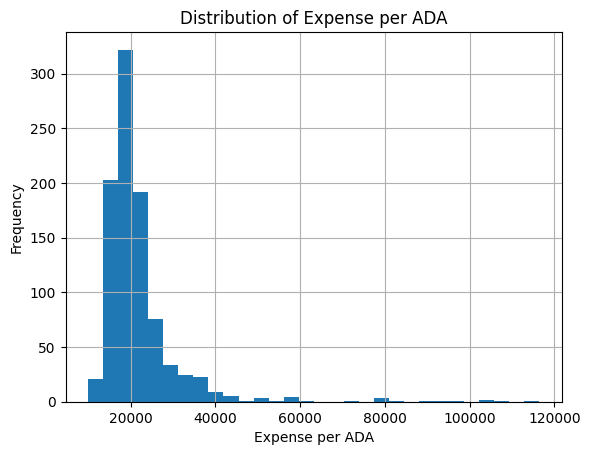

In [37]:
district_and_expenses['Expense per ADA'].hist(bins=30)

plt.title('Distribution of Expense per ADA')
plt.xlabel('Expense per ADA')
plt.ylabel('Frequency')
plt.show()

### Enrollment Distribution

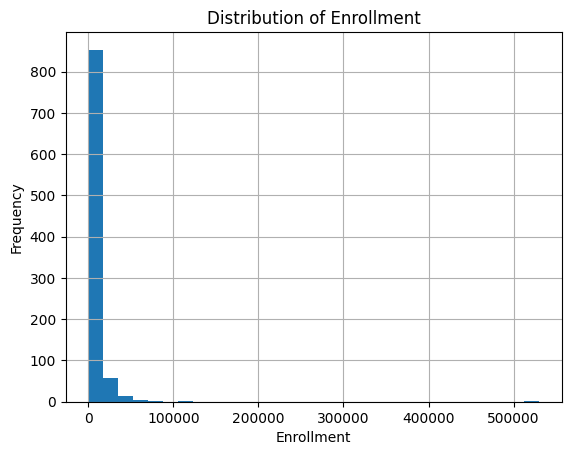

In [38]:
district_and_expenses['Enroll Total'].hist(bins=30)

plt.title('Distribution of Enrollment')
plt.xlabel('Enrollment')
plt.ylabel('Frequency')
plt.show()

### Expense vs. Size

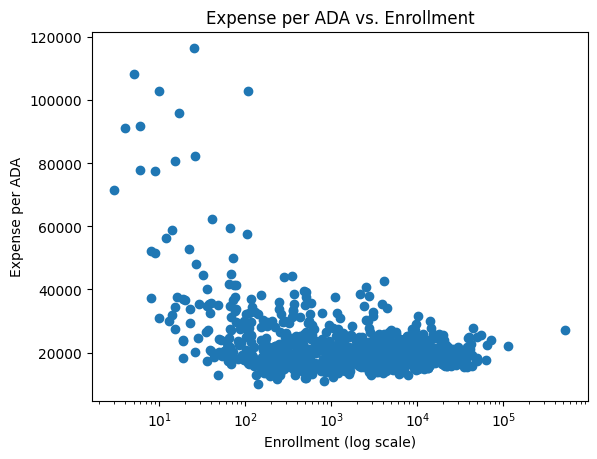

In [39]:
plt.scatter(district_and_expenses['Enroll Total'], district_and_expenses['Expense per ADA'])

plt.xscale('log')
plt.xlabel('Enrollment (log scale)')
plt.ylabel('Expense per ADA')
plt.title('Expense per ADA vs. Enrollment')
plt.show()

### Expense per ADA vs. Enrollment

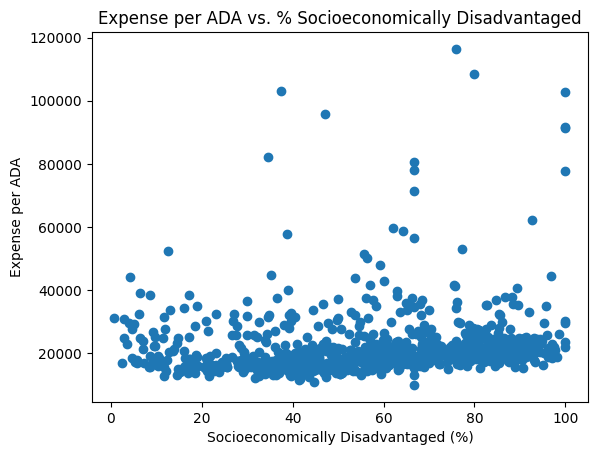

In [40]:
plt.scatter(district_and_expenses['Socioeconomically Disadvantaged (%)'],
            district_and_expenses['Expense per ADA'])

plt.xlabel('Socioeconomically Disadvantaged (%)')
plt.ylabel('Expense per ADA')
plt.title('Expense per ADA vs. % Socioeconomically Disadvantaged')
plt.show()

### Breakdown of Expense ADA by District Type & LEA Type

In [41]:
district_and_expenses.groupby('District Type')['Expense per ADA'].mean()

District Type
Elementary    22416.708680
High          20855.198451
Unified       21763.458696
Name: Expense per ADA, dtype: float64

In [42]:
district_and_expenses.groupby('LEA Type')['Expense per ADA'].mean() 

LEA Type
Comm Admin     22276.770000
Elementary     22418.080627
High School    20855.198451
Unified        21763.458696
Name: Expense per ADA, dtype: float64

### Correlation between
% White, % Hispanic, % African American
& Expense per ADA

In [43]:
district_and_expenses[['White (%)','Hispanic (%)','African American (%)','Expense per ADA']].corr()

,White (%),Hispanic (%),African American (%),Expense per ADA
White (%),1.000000,-0.824198,-0.265478,0.068713
Hispanic (%),-0.824198,1.000000,0.068219,-0.065251
African American (%),-0.265478,0.068219,1.000000,-0.041560
Expense per ADA,0.068713,-0.065251,-0.041560,1.000000


## Geospatial Processing & Choropleth Map

In [44]:
display(district_and_expenses[['District Code', 'District Name', 'Expense per ADA', 'District Label']].head())

,District Code,District Name,Expense per ADA,District Label
0,61119,Alameda Unified,18101.93,Alameda Unified (Alameda)
1,61127,Albany City Unified,17899.14,Albany City Unified (Alameda)
2,61143,Berkeley Unified,25728.70,Berkeley Unified (Alameda)
3,61150,Castro Valley Unified,15847.30,Castro Valley Unified (Alameda)
4,61168,Emery Unified,28597.44,Emery Unified (Alameda)


In [45]:
import json
# import geopandas as gpd

with open('district_areas.geojson') as f:
    geojson = json.load(f)
    print(geojson['features'][0]['properties'])

# district_areas_geo = gpd.read_file('district_areas.geojson')

{'OBJECTID': 1, 'Year': '2023-24', 'FedID': '0601770', 'CDCode': '0161119', 'CDSCode': '01611190000000', 'CountyName': 'Alameda', 'DistrictName': 'Alameda Unified', 'DistrictType': 'Unified', 'GradeLow': 'KG', 'GradeHigh': '12', 'GradeLowCensus': 'KG', 'GradeHighCensus': '12', 'AssistStatus': 'General Assistance', 'CongressUS': '13', 'SenateCA': '09', 'AssemblyCA': '18', 'LocaleDistrict': '21 - Suburban, Large', 'UpdateNotes': 'SY 2018-19 Boundary Adjustment/Correction', 'EnrollTotal': 10557, 'EnrollCharter': 1496, 'EnrollNonCharter': 9061, 'AAcount': 748, 'AApct': 7.1, 'AIcount': 25, 'AIpct': 0.2, 'AScount': 2610, 'ASpct': 24.7, 'FIcount': 484, 'FIpct': 4.6, 'HIcount': 1878, 'HIpct': 17.8, 'PIcount': 52, 'PIpct': 0.5, 'WHcount': 2844, 'WHpct': 26.9, 'MRcount': 1596, 'MRpct': 15.1, 'NRcount': 320, 'NRpct': 3, 'ELcount': 906, 'ELpct': 8.6, 'FOScount': 27, 'FOSpct': 0.3, 'HOMcount': 91, 'HOMpct': 0.9, 'MIGcount': 0, 'MIGpct': 0, 'SWDcount': 1286, 'SWDpct': 12.2, 'SEDcount': 4035, 'SEDpct

In [46]:
#How to get the California state outline here? 

district_and_expenses['cost_adjusted_per_ADA'] = district_and_expenses['Expense per ADA'] - district_and_expenses['Expense ADA']

In [47]:
print("Top5_df", top5_df[['CDS Code', 'cost_adjusted_per_ADA']])
print("GeoJSON features", filtered_features)

NameError: name 'top5_df' is not defined

In [44]:
# top5_df = district_and_expenses.nlargest(5, 'cost_adjusted_per_ADA')

# top5_codes = set(top5_df['CDS Code'])
# filtered_features = [
#     feature for feature in geojson['features']
#     if feature['properties']['CDSCode'] in top5_codes
# ]
# geojson_top5 = {**geojson, 'features': filtered_features}


# fig = px.choropleth(
#     top5_df,
#     geojson=geojson_top5,
#     locations='CDS Code',          
#     featureidkey="properties.CDSCode",
#     color='cost_adjusted_per_ADA',
#     color_continuous_scale='RdBu_r',
#     range_color=(-5000, 5000),   
#     hover_data={
#         "District Name": True,
#         "Expense per ADA": True,
#         "District Type": True,
#         "cost_adjusted_per_ADA": True,
#     }
# )

# fig.update_geos(fitbounds="locations", visible=False)
# fig.update_layout(
#     title="California School District Underfunding Gaps (Top 5 Only)",
#     margin={"r":0,"t":50,"l":0,"b":0}
# )
# fig.show()

# Force consistent code types in both datasets
top5_df['CDS Code'] = top5_df['CDS Code'].astype(str)
for feature in geojson['features']:
    feature['properties']['CDSCode'] = str(feature['properties']['CDSCode'])

top5_codes = set(top5_df['CDS Code'])
filtered_features = [
    feature for feature in geojson['features']
    if feature['properties']['CDSCode'] in top5_codes
]
geojson_top5 = {**geojson, 'features': filtered_features}

import plotly.express as px
fig = px.choropleth(
    top5_df,
    geojson=geojson_top5,
    locations='CDS Code',
    featureidkey="properties.CDSCode",
    color='cost_adjusted_per_ADA',
    color_continuous_scale='RdBu_r',
    range_color=(-5000, 5000),
    hover_data={
        "District Name": True,
        "Expense per ADA": True,
        "District Type": True,
        "cost_adjusted_per_ADA": True,
    }
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    title="California School District Underfunding Gaps (Top 5 Only)",
    margin={"r":0,"t":50,"l":0,"b":0}
)
fig.show()

NameError: name 'top5_df' is not defined

References: 
https://plotly.com/python/choropleth-maps/
https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html

## Scatter Plots, Box Plots, Horizontal Bar Chart - Demographics vs. Funding, Demographics vs. Expense per ADA

Notes:
- Google Slides can easily used to format fonts and overlays (for SlideDoc aesthetics)

Rendering more pythonic - use UMGPT

In [50]:
# Create a varibale to hold the median value of 'Expense per ADA' to be used to determine the funding 
# status of a district
threshold = district_and_expenses['Expense per ADA'].median()

# Create a column in the DataFrame that will keep track of a district's funding status using the median
# value of 'Expense per ADA' as the threshold
district_and_expenses['Funding'] = district_and_expenses['Expense per ADA'].apply(lambda x: 'Well-funded' if x > threshold else 'Underfunded')

In [275]:
# Create a list to keep track of the student demographic columns
# CREATE GLOBAL
demographics = ['African American (%)', 'American Indian (%)', 'Asian (%)','Filipino (%)',
                'Hispanic (%)', 'Pacific Islander (%)', 'White (%)', 'Two or More Races (%)']
add = ['English Learner (%)', 'Foster (%)', 'Homeless (%)', 'Migrant (%)', 'Students with Disabilities (%)', 'Socioeconomically Disadvantaged (%)']
# What is Not Reported (%)'

# Create a new DataFrame with only the desired columns including demographic percentages
dist_and_exp_demos = district_and_expenses[['District Label', 'District Type', 'Funding', 'Expense per ADA'] + demographics]

# Melt the DataFrame for scatter and box plots
dist_and_exp_demos_melt = dist_and_exp_demos.melt(id_vars=['District Label', 'District Type', 'Funding', 'Expense per ADA'], 
                                                  value_vars=demographics, 
                                                  var_name='Demographic', 
                                                  value_name='Demographic (%)')

# Remove ' (%)' from the end of each demographic name in the 'Demographic' column
dist_and_exp_demos_melt['Demographic'] = dist_and_exp_demos_melt['Demographic'].str.slice(stop=-4)  

# Sort by 'District Label' column and reset the index
dist_and_exp_demos_melt = dist_and_exp_demos_melt.sort_values('District Label', ascending=False).reset_index(drop=True)

display(dist_and_exp_demos_melt) # (rows = 933 x 8 demos)

,District Label,District Type,Funding,Expense per ADA,Demographic,Demographic (%)
0,Yucaipa-Calimesa Joint Unified (San Bernardino),Unified,Underfunded,18294.56,White,42.8
1,Yucaipa-Calimesa Joint Unified (San Bernardino),Unified,Underfunded,18294.56,African American,1.4
2,Yucaipa-Calimesa Joint Unified (San Bernardino),Unified,Underfunded,18294.56,Filipino,0.4
3,Yucaipa-Calimesa Joint Unified (San Bernardino),Unified,Underfunded,18294.56,American Indian,0.4
4,Yucaipa-Calimesa Joint Unified (San Bernardino),Unified,Underfunded,18294.56,Hispanic,50.6
...,...,...,...,...,...,...
7443,ABC Unified (Los Angeles),Unified,Underfunded,18827.59,Two or More Races,4.0
7444,ABC Unified (Los Angeles),Unified,Underfunded,18827.59,Asian,23.7
7445,ABC Unified (Los Angeles),Unified,Underfunded,18827.59,Pacific Islander,0.5
7446,ABC Unified (Los Angeles),Unified,Underfunded,18827.59,African American,7.0


### Scatter Plots - Demographic (%) vs. Expense per ADA

WORK ON VISUALS FOR OTHER DEMOGRAPHICS AS WELL!!!

Plotly References:
- API: https://plotly.com/python-api-reference/generated/plotly.graph_objects.Scatter.html
- Documentation: https://plotly.com/python/line-and-scatter/
- Subplots: https://plotly.com/python/subplots/

In [533]:
# Any type of scaling needed 

# PLOT FOR ALL DEMOGRAPHICS VS. EXPENSE PER ADA
demo_scatter_all = scatter = px.scatter(dist_and_exp_demos_melt, 
                                        x='Demographic (%)', 
                                        y='Expense per ADA', 
                                        color='Demographic', # Work on color scheme !!!
                                        # symbol='District Type',
                                        # symbol_map=symbol_map,
                                        opacity=0.5,
                                        trendline='ols', # Which trendline should we use?
                                        hover_data=dist_and_exp_demos_melt.columns,
                                        title='Scatter Plot of Demographic Percentages vs. Expense per ADA')


# INDIVIDUAL PLOTS FOR EACH DEMOGRAPHIC VS. EXPENSE PER ADA
from plotly.subplots import make_subplots

# Create subplots
subplot_titles = [demo + ' vs. Expense per ADA' for demo in demographics]
subplot_locations = [[1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2], [4, 1], [4, 2]]
demo_scatter_indiv = make_subplots(rows=4, cols=2,
                                   subplot_titles=subplot_titles)

# Find a way to add trendlines!!!
def plot_demographic_vs_expense(demographic, row, col):
    demo = demographic.split(' (%)')[0]
    demo_df = dist_and_exp_demos_melt[dist_and_exp_demos_melt['Demographic'] == demo]
    demo_scatter_indiv.add_trace(go.Scatter(x=demo_df['Demographic (%)'], 
                                            y=demo_df['Expense per ADA'], 
                                            mode='markers', 
                                            # Add trendline
                                            # Add more to hover data !!!
                                            # Need to do something with color here !!!
                                            name=demo), row=row, col=col)

# Correctly use subplot_locations
for index, demographic in enumerate(demographics):
    plot_demographic_vs_expense(demographic, subplot_locations[index][0], subplot_locations[index][1])

# Update layout
demo_scatter_indiv.update_layout(height=1100, 
                                 width=1000, 
                                 title_text='Scatter Plots of Demographic Percentages vs. Expense per ADA',
                                 showlegend=False)

demo_scatter_indiv.update_annotations(font_size=14)
demo_scatter_indiv.update_xaxes(title_text='Demographic (%)', title_font=dict(size=12), tickfont=dict(size=11))
demo_scatter_indiv.update_yaxes(title_text='Expense per ADA', title_font=dict(size=12), tickfont=dict(size=11))                   

demo_scatter_all.show()
demo_scatter_indiv.show()

###  Box Plots - Demographics vs. Funding

WORK ON VISUALS FOR OTHER DEMOGRAPHICS AS WELL!!!

References:
- API: https://plotly.com/python-api-reference/generated/plotly.express.box.html
- Documenation: https://plotly.com/python/box-plots/

In [242]:
# HORIZONTAL BARS
demo_funding_box = px.box(dist_and_exp_demos_melt, 
                          x='Demographic (%)', 
                          y='Demographic', 
                          color='Funding', 
                          color_discrete_sequence=['red', 'green'], # Change this based on final color scheme
                          title='Box Plots of Demographic Percentages by Funding Status')
demo_funding_box.show()

demo_funding_box = px.box(dist_and_exp_demos_melt, 
                          x='Demographic (%)',
                          y='Funding', 
                          color='Demographic', # Work with the coloring here based on final color scheme
                          title='Box Plots of Demographic Percentages by Funding Status')
demo_funding_box.show()


# VERTICAL BARS
demo_funding_box = px.box(dist_and_exp_demos_melt, 
                          x='Demographic', 
                          y='Demographic (%)', 
                          color='Funding',
                          color_discrete_sequence=['red', 'green'], # Change this based on final color scheme
                          title='Box Plots of Demographic Percentages by Funding Status')
# demo_funding_box.show()

demo_funding_box = px.box(dist_and_exp_demos_melt, 
                          x='Funding',
                          y='Demographic (%)', 
                          color='Demographic', # Work with the coloring here based on final color scheme
                          title='Box Plots of Demographic Percentages by Funding Status')
# demo_funding_box.show()

EDA - distribution of top, bottom demos, # of schools for each percentile - useful for references when checking, correlation

### Violin Plot - Top vs Bottom Demographics

WORK ON VISUALS FOR OTHER DEMOGRAPHICS AS WELL!!!

In [329]:
# Find top and bottom demographic of a school for each district label
district_and_expenses['Top Demographic (%)'] = district_and_expenses[demographics].idxmax(axis=1).str.slice(stop=-4)  
district_and_expenses['Bottom Demographic (%)'] = district_and_expenses[demographics].idxmin(axis=1).str.slice(stop=-4)  

# Do horizontal vs vertical
# Python virtual environment - VSCode 
# Check ruff
top_demo_violin = px.violin(district_and_expenses, 
                            x='Top Demographic (%)', 
                            y='Expense per ADA', 
                            # color='District Type',
                            box=True, 
                            points='all', 
                            hover_data=top_demo_df.columns, 
                            title='Distribution of Expense per ADA by Top Demographic')
top_demo_violin.update_traces(meanline_visible=True)
top_demo_violin.show()

bottom_demo_violin = px.violin(district_and_expenses, 
                               x='Bottom Demographic (%)', 
                               y='Expense per ADA', 
                               # color='District Type',
                               box=True, 
                               points='all',
                               hover_data=top_demo_df.columns, 
                               title='Distribution of Expense per ADA by Bottom Demographic')

bottom_demo_violin.update_traces(meanline_visible=True)
bottom_demo_violin.show()

# Do EDA to show number of times top of bottom demographic???

### Bar Charts

WORK ON VISUALS FOR OTHER DEMOGRAPHICS AS WELL!!!

References: 
- API: https://plotly.com/python-api-reference/generated/plotly.express.bar
- Documentation: https://plotly.com/python/bar-charts/

In [245]:
# top_10 = district_and_expenses.nlargest(10, 'White (%)')
# bottom_10 = district_and_expenses.nsmallest(10, 'White (%)')
# top_10['White Student (%)'] = 'Top 10'
# bottom_10['White Student (%)'] = 'Bottom 10'
# top_and_bottom = pd.concat([top_10, bottom_10])
# # display(top_and_bottom)

# fig = px.bar(top_and_bottom, 
#              x='Expense per ADA', 
#              y='District Label', 
#              color='White Student (%)', 
#              orientation='h',
#              barmode='group')
            
# fig.show()
# What type of factors have not been considered here?
# Maybe do different plots for different school types (district types/lea types)???

# Maybe take the mean of top 10 and bottom 10 for each demographic and plot those as bars instead???

In [497]:
# Example of top 25% for demo
# demo_t = district_and_expenses[district_and_expenses['African American (%)'] >= district_and_expenses['African American (%)'].quantile(0.75)]
# demo_t = demo_t[['District Label', 'Expense per ADA', 'African American (%)']].sort_values('African American (%)', ascending=False)
# display(demo_t)

In [ ]:
# SECOND WAY TO GET AVERAGE EXPENSE PER ADA BUT INCLUDES EXTRA INFO
# demo_dfs = []
# for demo in demographics:
#     demo_top = district_and_expenses[district_and_expenses[demo] >= district_and_expenses[demo].quantile(0.75)].assign(Demographic_Percentile='Top 25% - ' + demo)
#     demo_bottom = district_and_expenses[district_and_expenses[demo] <= district_and_expenses[demo].quantile(0.25)].assign(Demographic_Percentile='Bottom 25% - ' + demo)
#     demo_dfs.extend([demo_top, demo_bottom])

# demo_df = pd.concat(demo_dfs)[['District Label', 'Funding', 'Expense per ADA', 'Top Demographic (%)', 'Bottom Demographic (%)', 'Demographic_Percentile'] + demographics]
# demo_df = demo_df.sort_values('District Label', ascending=False)

# display(demo_df)
# display(demo_df.groupby('Demographic_Percentile')['Expense per ADA'].mean())
# display(demo_df.groupby(['Funding', 'Demographic_Percentile'])['Expense per ADA'].mean())

In [440]:
# Rename df to something better!
# Use average or not?? Median instead???
df = pd.DataFrame(columns=['Student Demographic (%)', 
                           'Student Demographic (%)<br>Percentile', 
                           'Average Expense per ADA'])

for demo in demographics:
    top_mean = district_and_expenses[district_and_expenses[demo] >= district_and_expenses[demo].quantile(0.75)]['Expense per ADA'].mean()
    bottom_mean = district_and_expenses[district_and_expenses[demo] <= district_and_expenses[demo].quantile(0.25)]['Expense per ADA'].mean()
    df.loc[len(df)] = [demo.split(' (%)')[0], 'Top 25% Percentile', top_mean]
    df.loc[len(df)] = [demo.split(' (%)')[0], 'Bottom 25% Percentile', bottom_mean]

fig = px.bar(df, 
             x='Average Expense per ADA', 
             y='Student Demographic (%)', 
             color='Student Demographic (%)<br>Percentile', 
             orientation='h', 
             barmode='group',
             text_auto=True,
             title='Average Expense per ADA for Top 25% vs. Bottom 25% Percentile of Each Student Demographic')

fig.update_traces(textfont=dict(color='white')) # Check default coloring

# Reverse the color ordering in legend???
fig.show()

Mean ADA of the Bottom 25% Highest % Asian Students = 21.41k
Mean ADA of the Bottom 25% Lowest % Asian Students = 28.13k

Mean ADA of the Top 25% of Highest % White Students = 23.13k
Mean ADA of the Bottom 25% Lowest % White Students = 22.32k

Insights?
- "Whitest Schools", Most White People
- Median - value = Gap?


In [524]:
# ONE WAY TO GET AVERAGE EXPENSE PER ADA
# Rename df to something better!
df = pd.DataFrame(columns=['Student Demographic (%)', 
                           'Student Demographic (%)<br>Percentile', 
                           'Funding',
                           # 'District Type',
                           'Average Expense per ADA'])

# # Fix this to combine with code from below cell andd use grouby/mean instead???
# Change funding to district type instead???!!!
for demo in demographics:
    for funding in ['Underfunded', 'Well-funded']:
        top_mean = district_and_expenses[(district_and_expenses[demo] >= district_and_expenses[demo].quantile(0.75)) 
                                         & (district_and_expenses['Funding'] == funding)]['Expense per ADA'].mean()
        bottom_mean = district_and_expenses[(district_and_expenses[demo] <= district_and_expenses[demo].quantile(0.25)) 
                                            & (district_and_expenses['Funding'] == funding)]['Expense per ADA'].mean()
        df.loc[len(df)] = [demo.split(' (%)')[0], funding, 'Top 25% Percentile', top_mean]
        df.loc[len(df)] = [demo.split(' (%)')[0], funding, 'Bottom 25% Percentile', bottom_mean]

    # for dist_type in district_and_expenses['District Type'].unique():
    #     top_mean = district_and_expenses[(district_and_expenses[demo] >= district_and_expenses[demo].quantile(0.75)) 
    #                                         & (district_and_expenses['District Type'] == dist_type)]['Expense per ADA'].mean()
    #     bottom_mean = district_and_expenses[(district_and_expenses[demo] <= district_and_expenses[demo].quantile(0.25)) 
    #                                         & (district_and_expenses['District Type'] == dist_type)]['Expense per ADA'].mean()
    #     df.loc[len(df)] = [demo.split(' (%)')[0], dist_type, 'Top 25% Percentile', top_mean]
    #     df.loc[len(df)] = [demo.split(' (%)')[0], dist_type, 'Bottom 25% Percentile', bottom_mean]
    

# display(df)

fig = px.bar(df, 
             x='Average Expense per ADA', 
             y='Student Demographic (%)', 
             color='Student Demographic (%)<br>Percentile', 
             pattern_shape='Funding',
             # pattern_shape='District Type',
             pattern_shape_sequence=['', '+'],
             orientation='h', 
             barmode='group',
             text_auto=True,
             title='Average Expense per ADA for Top 25% vs. Bottom 25% Percentile of Each Student Demographic')

fig.update_traces(textfont=dict(color='white')) # Check default coloring
fig.update_layout(height=800, width=900)

fig.show()

In [527]:
# df1 = district_and_expenses[district_and_expenses[demographics[0]] >= district_and_expenses[demographics[0]].quantile(0.75)] 
# df2 = district_and_expenses[district_and_expenses[demographics[0]] <= district_and_expenses[demographics[0]].quantile(0.25)] 
# df1['Demographic_Percentile'] = 'Top 25%'
# df2['Demographic_Percentile'] = 'Bottom 25%'
# df = pd.concat([df1, df2])
# df.groupby(['Demographic_Percentile', 'District Type'])['Expense per ADA'].mean()
# # Do plot for each demo???

In [46]:
# ex. median ADA for demo 
# violin plots for different ADA values 
# SPLOM for all demographics
# scatterplot ADA vs. demo
# regression correlation for different to see correlation
# find outlers!!! look at ADA vs enrollement - percentage difference (AW)


## Read from CSV using SQL

In [47]:
df_1 = _dntk.execute_sql(
  'SELECT *\nFROM \'district_and_expenses.csv\'',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_1

,Fed ID,District Code,CDS Code,County Name,District Name_x,District Type,Grade Low,Grade High,Grade Low Census,Grade High Census,...,Students with Disabilities,Students with Disabilities (%),Socioeconomically Disadvantaged,Socioeconomically Disadvantaged (%),District Label,District Name_y,EDP 365,Expense ADA,Expense per ADA,LEA Type
0,601770.0,61119,1.611190e+12,Alameda,Alameda Unified,Unified,KG,12,KG,12,...,1286.0,12.200000,4035.0,38.200000,Alameda Unified (Alameda),Alameda Unified,1.550948e+08,8567.86,18101.93,Unified
1,601860.0,61127,1.611270e+12,Alameda,Albany City Unified,Unified,KG,12,KG,12,...,320.0,9.000000,1122.0,31.400000,Albany City Unified (Alameda),Albany City Unified,6.149090e+07,3435.41,17899.14,Unified
2,604740.0,61143,1.611430e+12,Alameda,Berkeley Unified,Unified,KG,12,KG,12,...,1092.0,12.000000,2508.0,27.600000,Berkeley Unified (Alameda),Berkeley Unified,2.205508e+08,8572.17,25728.70,Unified
3,607800.0,61150,1.611500e+12,Alameda,Castro Valley Unified,Unified,KG,12,KG,12,...,1048.0,11.000000,3686.0,38.800000,Castro Valley Unified (Alameda),Castro Valley Unified,1.424913e+08,8991.52,15847.30,Unified
4,612630.0,61168,1.611680e+12,Alameda,Emery Unified,Unified,KG,12,KG,12,...,75.0,12.500000,327.0,54.500000,Emery Unified (Alameda),Emery Unified,1.586300e+07,554.70,28597.44,Unified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,NaN,76349,NaN,Mendocino,Arena Union Elementary/Point Arena Joint Union...,Elementary,KG,12,KG,8,...,64.0,14.883721,243.0,56.511628,Arena Union Elementary/Point Arena Joint Union...,Arena Union Elementary/Point Arena Joint Union...,1.016266e+07,325.53,31218.80,Comm Admin
929,NaN,40261,NaN,Santa Cruz,Santa Cruz City Elementary/High,Elementary,KG,5,KG,5,...,918.0,14.636480,2304.0,36.734694,Santa Cruz City Elementary/High (Santa Cruz),Santa Cruz City Elementary/High,1.152800e+08,5688.18,20266.58,Comm Admin
930,NaN,40246,NaN,Sonoma,Petaluma City Elementary/Joint Union High,Elementary,KG,12,KG,6,...,1309.0,17.717921,3326.0,45.018950,Petaluma City Elementary/Joint Union High (Son...,Petaluma City Elementary/Joint Union High,1.252075e+08,6651.17,18824.88,Comm Admin
931,NaN,40253,NaN,Sonoma,Santa Rosa City Schools,Elementary,KG,8,KG,6,...,2566.0,17.340181,7541.0,50.959589,Santa Rosa City Schools (Sonoma),Santa Rosa City Schools,2.486762e+08,11701.14,21252.30,Comm Admin


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=246b06f0-3e45-45e3-acef-efea2bae7701' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>